# 1. (a) Image manipulation: camera noise removing from images

Given the code to remove camera noise i.e., all pixel values less than 10 are made 0.

In [48]:
from skimage import io
import time
import numpy as np
import matplotlib.pyplot as plt

A = io.imread('H:\Courses\SP20\Computer Vision\Project0/grizzlypeakg.png')

(m1,n1) = A.shape

# counting time elapsed for provided code
t = time.time()
for i in range(m1):
    for j in range(n1):
        if A[i,j] <= 10 :
            A[i,j] = 0
elapsed_old1 = time.time() - t
print("Time elapsed for provided code"+ "=" + str(elapsed_old1))

Time elapsed for provided code=2.795522928237915


I want to speed up the camera noise removal process for this single gray level image. The modified code is shown below to speed the process up where I did not use for loops to manually select a pixel to manipulate. I imoprted the image into an array (2D), and found out all indices in the array where pixel value is less than 10. Then I replaced the selected indices and replaced by 0. I showed the time taken for the image for both the cases and divided time taken by old process by modified to find out speed factor. 

In [51]:
B = io.imread('H:\Courses\SP20\Computer Vision\Project0/grizzlypeakg.png')
t = time.time()
threshold_indices = B < 10
B[threshold_indices] = 0
elapsed_new1 = time.time() - t
print("Time elapsed for my code"+ "=" + str(elapsed_new1))

factor_1 = elapsed_old1/elapsed_new1
print("speed factor for a single gray image" + "=" + str(factor_1))

Time elapsed for my code=0.005984783172607422
speed factor for a single gray image=467.1051310652538


# (b)

Now, it's time to find out speed factor for many images (say 1000) together. In order to make it simple I tested speed factor for 10 images. 
I imported 10 images from a file into a single numpy array (3D). Like a single image, I found out all indices in the array where pixel value is less than 10 and replaced by 0. I calculated speed factor for 10 gray images as follows.

In [52]:
# for 10 images typical way
A = io.ImageCollection('H:\Courses\SP20\Computer Vision\Project0/dataset' + '/dat*.tif')
c = io.collection.concatenate_images(A)
t = time.time()
l1,l2,l3 = c.shape
for k in range(l1):
    for i in range(l2):
        for j in range(l3):
            if c[k,i,j] <= 10 :
                c[k,i,j] = 0
elapsed_10 = time.time() - t
print("Time elapsed for given code for 10 images"+ "=" + str(elapsed_10))

# 10 images own way
A = io.ImageCollection('H:\Courses\SP20\Computer Vision\Project0/dat' + '/dat*.tif')
d = io.collection.concatenate_images(A)
t = time.time()
threshold_indices = d < 10
d[threshold_indices] = 0
elapsed_10n = time.time() - t
print("Time elapsed for my code for 10 images"+ "=" + str(elapsed_10n))

elapsed_old = elapsed_10*1000/10
elapsed_new = elapsed_10n*1000/10
factor_10 = elapsed_old/elapsed_new
print("speed factor for 10 images" + "=" + str(factor_10))

Time elapsed for given code for 10 images=6.148353338241577
Time elapsed for my code for 10 images=0.0029921531677246094
speed factor for 10 images=2054.8257370517927


I expec that if I really follow the above steps to manupulate image jitter for 1000 images, speed up factor should rise higher than that of 10 images. 

# (c)

Now I am interested to perform the same oprration on color image. The following code exactly does that.

In [53]:
A = io.imread('H:\Courses\SP20\Computer Vision\Project0/grizzlypeakg.jpg')
l1,l2,l3 = c.shape
t = time.time()
for k in range(l1):
    for i in range(l2):
        for j in range(l3):
            if c[k,i,j] <= 10 :
                c[k,i,j] = 0
elapsed_c = time.time() - t
print("Time elapsed for my code for color image"+ "=" + str(elapsed_c))

# color image
A = io.imread('H:\Courses\SP20\Computer Vision\Project0/grizzlypeakg.jpg')
t = time.time()
threshold_indices = A < 10
A[threshold_indices] = 0
elapsed_color = time.time() - t
print("Time elapsed for my code for color image"+ "=" + str(elapsed_color))
# =============================================================================
# plt.imshow(A)
# plt.show()
# =============================================================================


factor_color = elapsed_c/elapsed_color
print("speed factor for a color image" + "=" + str(factor_color))

Time elapsed for my code for color image=6.260490417480469
Time elapsed for my code for color image=0.01558375358581543
speed factor for a color image=401.73186665238745


# 2. Image manipulation: reducing brightness of a color image

The following code is given for reducing brightness of a color image. My responsibility is to debug the following piece of code. 

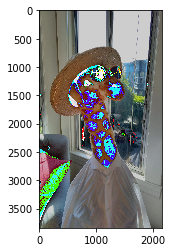

In [54]:
I = io.imread('H:\Courses\SP20\Computer Vision\Project0/gigi.jpg')
I = I - 50
plt.imshow( I )
plt.show()

This code did not work as we expected. This is because, when we subtract 50 from the image array I, we expect some negative values. When we plot the image, those negative values in the color intencity becomes erratic. I modified the code as follows to avoid pixel values going negative. 

Note: pixel values can not be negative. They are in between 0 and 255 inclusive. 

Text(0.5, -0.001, 'Brightness reduction of a color image')

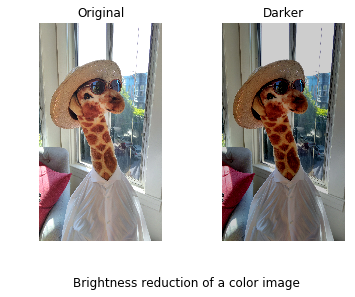

In [55]:
fig1, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
I = io.imread('H:\Courses\SP20\Computer Vision\Project0/gigi.jpg')
ax1.imshow(I)
ax1.axis('off')
x,y,c = I.shape
threshold_indices = I < 50
I[threshold_indices] = 50
I = I - 50
ax2.imshow(I)
ax2.axis('off')

ax1.set_title("Original")
ax2.set_title("Darker")
fig1.suptitle('Brightness reduction of a color image', y=-0.001)
